1) Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Supervised learning involves building and training a model based on inputs and corresponding outputs.  Problems addressed with supervised learning generally fall under one of two categories: classification or regression.

Linear Regression, like its name applies, tries to model the relationship of two variables (one independent, one dependent) by fitting a line to the coordinate points of a dataset.  The resulting equation can be written in the slope-intercept format of y = mx + b: x represents the independent variable, y is the dependent variable, m is the slope of the regression line, and b is the coordinate of the y-intercept (when x=0).  Pros: computationally efficient, easy to visualize and understand.  Cons: can be too simplistic for some real-world applications; can be very affected/skewed by outliers

K Nearest Neighbor (KNN) is a "lazy learning" supervised learning method.  It operates under the principle that data points in the same vicinity (within a given area or cluster) will have similar characteristics.  Given known groupings of data, the algorithm compares the traits of an input datapoint to the characteristics of the known groupings, and predicts which grouping the input belongs to based on which group it most closely resembles.  Pros: Fast at training.  Cons: Slower at predicting, and not the most computationally efficient (must store dataset in memory).

Linear Classifiers are a family of supervised learning methods that, at their most basic, divide datasets using lines, hence the "linear" description.  While they naturally deal with linearly separable data (binary classification problems), they can be modified to be used for non-linear purposes.

Logistic Regression models the chance or probability of a given data point belonging to one of two groups (binary classification).

Support Vector Machines (SVM) are a bit like KNN as they are both grouping approaches.  With SVM, you're looking for a hyperplane or decision boundary that splits the data points into two separate groups or classes.  Thus, this model works well for binary classification problems and linearly separable data (though it can be used on non-linearly separable data using the kernel trick).  Pros: Fast compared to logistic regression and neural networks; performs well with relatively small quantities of data.  Cons: Don't directly yield answers/percentages for probability problems.

Decision Tree: This supervised learning model resembles a flow chart.  Beginning with a root node, each node poses a binary question or test to the data; the two prongs forking off of each node represent data that did or did not meet the criteria of the test.  A node might classify a data point as true/false, being less than/greater than a given quantity, etc.  Continuing the tree metaphor, "branches" are the prongs that fork off each node.  Once you hit a point where the data doesn't split any further (aka, no further useful information can be gained by branching again), the terminal forks are called "leaves."  Pros: Binary structure is fairly easy to comprehend and visualize; doesn't require a ton of data preprocessing. Cons: Not the most reliable/accurate supervised learning method; can be prone to overfitting

Ensemble methods: General approach to machine learning where several methods/models are used "in concert" with each other for more harmonious (aka accurate) results.  

Random Forest: Ensemble learning method that harnesses the power of a large number ("forest") of decision trees.  Predictions/classifications are decided by how the majority of the trees "vote."  Pros: With no one tree holding all the decision-making power, random forests are less likely to overfit than decision trees.

2) Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

Unsupervised learning tries to discern patterns in data where there is no concrete output goal - aka, there isn't a specified relationship between independent and dependent variables at the outset.  Framing it another way: supervised learning uses labeled input data, while the data used in unsupervised learning is generally unlabeled.  These methods can be used for association, clustering, and dimensionality reduction problems.

Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to scale down a dataset to its most essential elements (or "principal components") with minimal information loss.  Pros: simplifies complex data sets for easier comprehension/manipulation.  Cons: That simplicity comes with a tradeoff of losing some accuracy.

K Means: a clustering technique where "k" represents the number of clusters observed in the data.  The so-called elbow method can be used to determine the optimal number of clusters.  Each cluster has a central point or centroid, and data points are clustered according to which centroid they are closest to.  Cons: Because the centroids are randomly chosen each time the algorithm is run, it may need to be run multiple times and the results averaged to avoid potential distortion/skewing.

3) Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [12]:
filetoload = "data.csv"

In [13]:
#convert e-commerce data to pandas dataframe
#
df = pd.read_csv(filetoload, encoding = "ISO-8859-1", engine='python')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
#look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
#do we have null values?  if so, in which columns?
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
#missing descriptions and customerIDs should not affect the data quality much
#still likely legit purchases - some buyers may not have an account (no customerID),
#description may be a recently added field - older products/transactions may not have been retrofitted with descriptions
#aka, would be more disruptive/hurt model accuracy to drop affected entries

#let's fill null customerIDs with zeroes
df['CustomerID'].fillna(0, inplace=True)
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [17]:
#fill null Descriptions with... a description of their lack of descriptions (Descriptionception)
df['Description'].fillna('No description provided', inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
#make CustomerID whole numbers
df['CustomerID'] = df['CustomerID'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [19]:
#what are the most expensive items?
sorted_df = df.sort_values('UnitPrice', ascending=False)
sorted_df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,0,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,0,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,0,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,0,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,0,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:04,13541.33,0,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:34,13474.79,0,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:35,11586.50,0,United Kingdom
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,0,United Kingdom


In [20]:
#you can't have negative quantities; these entries look to be various Amazon fee and manual transactions
#we may want to drop these to get a more accurate picture of customer purchasing habits
no_negs_df = sorted_df.loc[sorted_df["Quantity"] >= 0]
no_negs_df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,0,United Kingdom
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,0,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,8/11/2011 10:14,4505.17,0,United Kingdom
268028,560373,M,Manual,1,7/18/2011 12:30,4287.63,0,United Kingdom
422351,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536,France
422376,573080,M,Manual,1,10/27/2011 14:20,4161.06,12536,France
406406,571751,M,Manual,1,10/19/2011 11:18,3949.32,12744,Singapore
374542,569382,M,Manual,1,10/3/2011 16:44,3155.95,15502,United Kingdom
347948,567353,M,Manual,1,9/19/2011 16:14,2653.95,0,Hong Kong


In [21]:
#looks like we still have some random fees
#hard to say whether to keep "Manual" entries - may be valid sales, but do they do more to help the other data
#than hinder it?
#let's go ahead and try dropping them, along with remaining Amazon fees, postage fees, & dotcom fees
no_fees_df = no_negs_df.loc[(no_negs_df["StockCode"] != 'DOT') & (no_negs_df["StockCode"] != 'M') & 
                           (no_negs_df["StockCode"] != 'AMAZONFEE') & (no_negs_df["StockCode"] != 'POST')
                           & (no_negs_df["StockCode"] != 'B')]
no_fees_df = no_fees_df.sort_values('UnitPrice', ascending=False)
no_fees_df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.5,15098,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.5,15098,United Kingdom
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011 11:38,295.0,13452,United Kingdom
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,4/28/2011 12:22,295.0,14973,United Kingdom
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010 8:41,295.0,16607,United Kingdom
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010 18:06,295.0,13145,United Kingdom
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,3/25/2011 14:19,295.0,13452,United Kingdom
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011 15:32,295.0,14842,United Kingdom
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,1/10/2011 14:57,295.0,17406,United Kingdom
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,5/26/2011 16:25,295.0,13015,United Kingdom


In [22]:
#what are the most purchased items?
least_purch = no_fees_df.sort_values('Quantity', ascending=False)
least_purch.head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256,United Kingdom
74614,542504,37413,No description provided,5568,1/28/2011 12:03,0.00,0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135,United Kingdom
220843,556231,85123A,?,4000,6/9/2011 15:04,0.00,0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/2011 17:04,0.06,14609,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/2011 12:55,2.10,15749,United Kingdom


In [23]:
#what countries are represented in this data?
no_fees_df.Country.value_counts()

United Kingdom          485234
Germany                   8659
France                    8102
EIRE                      7889
Spain                     2423
Netherlands               2326
Switzerland               1936
Belgium                   1935
Portugal                  1464
Australia                 1184
Norway                    1049
Channel Islands            747
Italy                      741
Finland                    647
Cyprus                     612
Unspecified                446
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     295
Hong Kong                  279
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
RSA                         57
European Community          57
Lebanon 

In [24]:
#what types of products are represented by data?
no_fees_df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2327
JUMBO BAG RED RETROSPOT                2115
REGENCY CAKESTAND 3 TIER               2019
PARTY BUNTING                          1707
LUNCH BAG RED RETROSPOT                1594
                                       ... 
BLUE PADDED SOFT MOBILE                   1
LARGE ROUND CUTGLASS CANDLESTICK          1
PINK ALLIUM  ARTIFICIAL FLOWER            1
16 PC CUTLERY SET PANTRY DESIGN           1
did  a credit  and did not tick ret       1
Name: Description, Length: 4074, dtype: int64

In [25]:
#KMeans doesn't like the alpha characters in StockCode
#let's label encode it
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
no_fees_df['StockCode'] = label_encoder.fit_transform(no_fees_df['StockCode'])
no_fees_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222682,556446,1387,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.5,15098,United Kingdom
222680,556444,1387,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.5,15098,United Kingdom
118769,546480,1534,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011 11:38,295.0,13452,United Kingdom
171178,551393,1534,VINTAGE BLUE KITCHEN CABINET,1,4/28/2011 12:22,295.0,14973,United Kingdom
32484,539080,1533,VINTAGE RED KITCHEN CABINET,1,12/16/2010 8:41,295.0,16607,United Kingdom
4989,536835,1533,VINTAGE RED KITCHEN CABINET,1,12/2/2010 18:06,295.0,13145,United Kingdom
133994,547814,1534,VINTAGE BLUE KITCHEN CABINET,1,3/25/2011 14:19,295.0,13452,United Kingdom
82768,543253,1533,VINTAGE RED KITCHEN CABINET,1,2/4/2011 15:32,295.0,14842,United Kingdom
51636,540647,1533,VINTAGE RED KITCHEN CABINET,1,1/10/2011 14:57,295.0,17406,United Kingdom
205759,554836,1533,VINTAGE RED KITCHEN CABINET,1,5/26/2011 16:25,295.0,13015,United Kingdom


In [26]:
label_encoder = preprocessing.LabelEncoder()
no_fees_df['Description'] = label_encoder.fit_transform(no_fees_df['Description'])
no_fees_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222682,556446,1387,2475,1,6/10/2011 15:33,649.5,15098,United Kingdom
222680,556444,1387,2475,60,6/10/2011 15:28,649.5,15098,United Kingdom
118769,546480,1534,3710,1,3/14/2011 11:38,295.0,13452,United Kingdom
171178,551393,1534,3710,1,4/28/2011 12:22,295.0,14973,United Kingdom
32484,539080,1533,3759,1,12/16/2010 8:41,295.0,16607,United Kingdom
4989,536835,1533,3759,1,12/2/2010 18:06,295.0,13145,United Kingdom
133994,547814,1534,3710,1,3/25/2011 14:19,295.0,13452,United Kingdom
82768,543253,1533,3759,1,2/4/2011 15:32,295.0,14842,United Kingdom
51636,540647,1533,3759,1,1/10/2011 14:57,295.0,17406,United Kingdom
205759,554836,1533,3759,1,5/26/2011 16:25,295.0,13015,United Kingdom


In [27]:
label_encoder = preprocessing.LabelEncoder()
no_fees_df['Country'] = label_encoder.fit_transform(no_fees_df['Country'])
no_fees_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222682,556446,1387,2475,1,6/10/2011 15:33,649.5,15098,36
222680,556444,1387,2475,60,6/10/2011 15:28,649.5,15098,36
118769,546480,1534,3710,1,3/14/2011 11:38,295.0,13452,36
171178,551393,1534,3710,1,4/28/2011 12:22,295.0,14973,36
32484,539080,1533,3759,1,12/16/2010 8:41,295.0,16607,36
4989,536835,1533,3759,1,12/2/2010 18:06,295.0,13145,36
133994,547814,1534,3710,1,3/25/2011 14:19,295.0,13452,36
82768,543253,1533,3759,1,2/4/2011 15:32,295.0,14842,36
51636,540647,1533,3759,1,1/10/2011 14:57,295.0,17406,36
205759,554836,1533,3759,1,5/26/2011 16:25,295.0,13015,36


In [28]:
#couldn't get date in a format that behaved with models - dropping that column
ecomm_df = no_fees_df.drop('InvoiceDate', axis=1)
ecomm_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
222682,556446,1387,2475,1,649.5,15098,36
222680,556444,1387,2475,60,649.5,15098,36
118769,546480,1534,3710,1,295.0,13452,36
171178,551393,1534,3710,1,295.0,14973,36
32484,539080,1533,3759,1,295.0,16607,36


4) Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [29]:
x1 = ecomm_df['UnitPrice'].values
x2 = ecomm_df['Quantity'].values
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

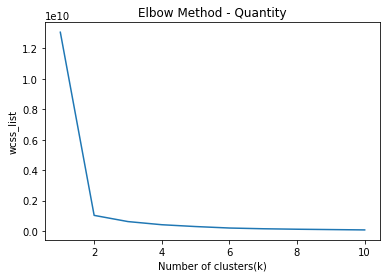

In [30]:
#find the optimal number of clusters with elbow method  
from sklearn.cluster import KMeans

#initialize wcss list
wcss_list= []

for n in range(1, 11):  
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 18)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss_list)  
plt.title('Elbow Method - Quantity')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

5) Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [31]:
from sklearn.preprocessing import normalize
data_scaled = normalize(ecomm_df)
data_scaled = pd.DataFrame(ecomm_df, columns=ecomm_df.columns)
data_scaled.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
222682,556446,1387,2475,1,649.5,15098,36
222680,556444,1387,2475,60,649.5,15098,36
118769,546480,1534,3710,1,295.0,13452,36
171178,551393,1534,3710,1,295.0,14973,36
32484,539080,1533,3759,1,295.0,16607,36


In [32]:
sample = data_scaled.sample(n=500)
sample

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
500193,578746,1279,2017,1,4.96,0,36
114838,546090,397,2826,10,1.25,16525,36
190703,553204,1787,1696,1,0.65,16877,36
165661,550819,1707,1727,3,4.65,17530,36
282113,561626,2712,1043,1,7.95,14898,36
...,...,...,...,...,...,...,...
394215,570871,1598,3219,1,8.29,0,36
430466,573585,894,759,1,4.13,0,36
91565,544106,1088,49,2,8.50,14530,36
109640,545657,1386,2476,2,9.95,14911,10


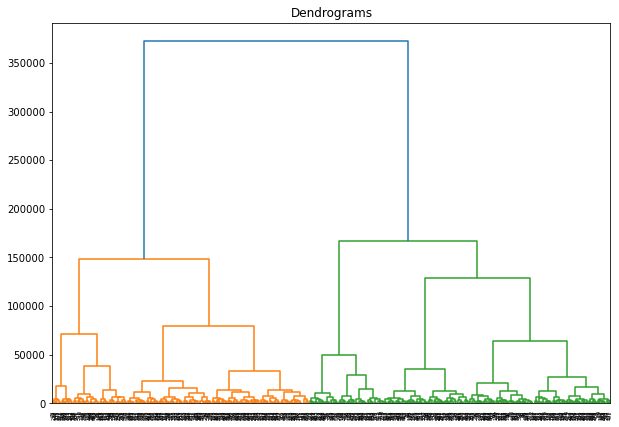

In [34]:
#computer froze when trying to run dendrogram on entire dataset
#using sample

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(sample, method='ward'))

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(sample)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

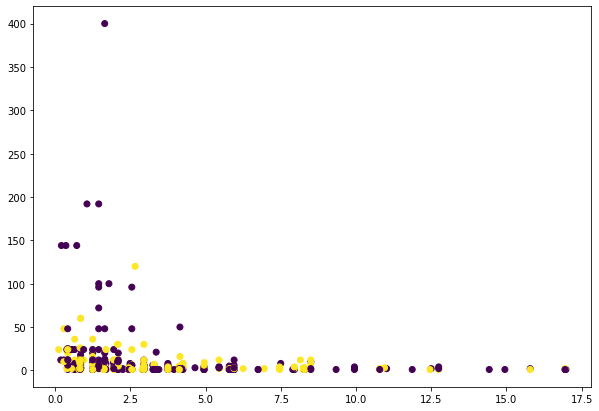

In [38]:
plt.figure(figsize=(10, 7))  
plt.scatter(sample['UnitPrice'], sample['Quantity'], c=cluster.labels_) 

6) Compare the results of 4 and 5. Which approach do you think is best? Why? 

I don't think I did either correctly, so I'm not sure I can properly compare them.  From a computational and pragmatic standpoint, clustering (at least hierarchical) seems to demand a lot more horsepower than I and some classmates have access to; for us, K Means is the way to go.

Maybe in future instances of this course, spend more than a week on unsupervised learning?  Feels like we didn't get a whole lot out of this topic since we spent so little time on it.